In [1]:
##### GROVER'S ALGORITHM #######################################
# Qiskit
# Applications: 
# Aeriana Narbonne 
#################################################################

In [44]:
from qiskit import *

In [45]:
#################################################################
# 1. grover algorithm sps w = |11>

In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# define the oracle 
oracle = QuantumCircuit(2, name = 'oracle') #set n qubits = 2, name
oracle.cz(0,1)  # control z gate (control, target)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [48]:
# we check that the oracle does what we want
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])

grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [49]:
# prep the statevector 
job = execute(grover_circ, backend)
result = job.result()
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [50]:
# Uf reflection 
reflection = QuantumCircuit(2, name = 'reflection')

reflection.h([0, 1])
reflection.z([0, 1])
reflection.cz(0, 1)
reflection.h({0, 1})

reflection.to_gate()
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [51]:
# append circuit i.e. put gates above together into 1 circuit 
backend = Aer.get_backend('qasm_simulator')

grover_circ = QuantumCircuit(2,2)
grover_circ.h([0, 1])
grover_circ.append(oracle, [0, 1])
grover_circ.append(reflection, [0, 1])
grover_circ.measure([0,1], [0,1])

In [52]:
job = execute(grover_circ, backend, shots = 1)
result = job.result()
result.get_counts()
# note, same as:  job.result().get_counts()

{'11': 1}

In [53]:
# please note that for the next section 
# you will need to do the following installs (in cmd): 
# DO NOT pip install qiskit-aqua >>
# pip install qiskit==0.31.0

In [62]:
#################################################################
# 2. Application: note this has been revised as of 2023 when aqua was phased out 
from qiskit import BasicAer
from qiskit.algorithms import Grover, AmplificationProblem # to use above need to make 
from qiskit.circuit.library import PhaseOracle #LogicalExpressionOracle
from qiskit.tools.visualization import plot_histogram

Time:  0.0001860999982454814


Time:  0.00010010000551119447


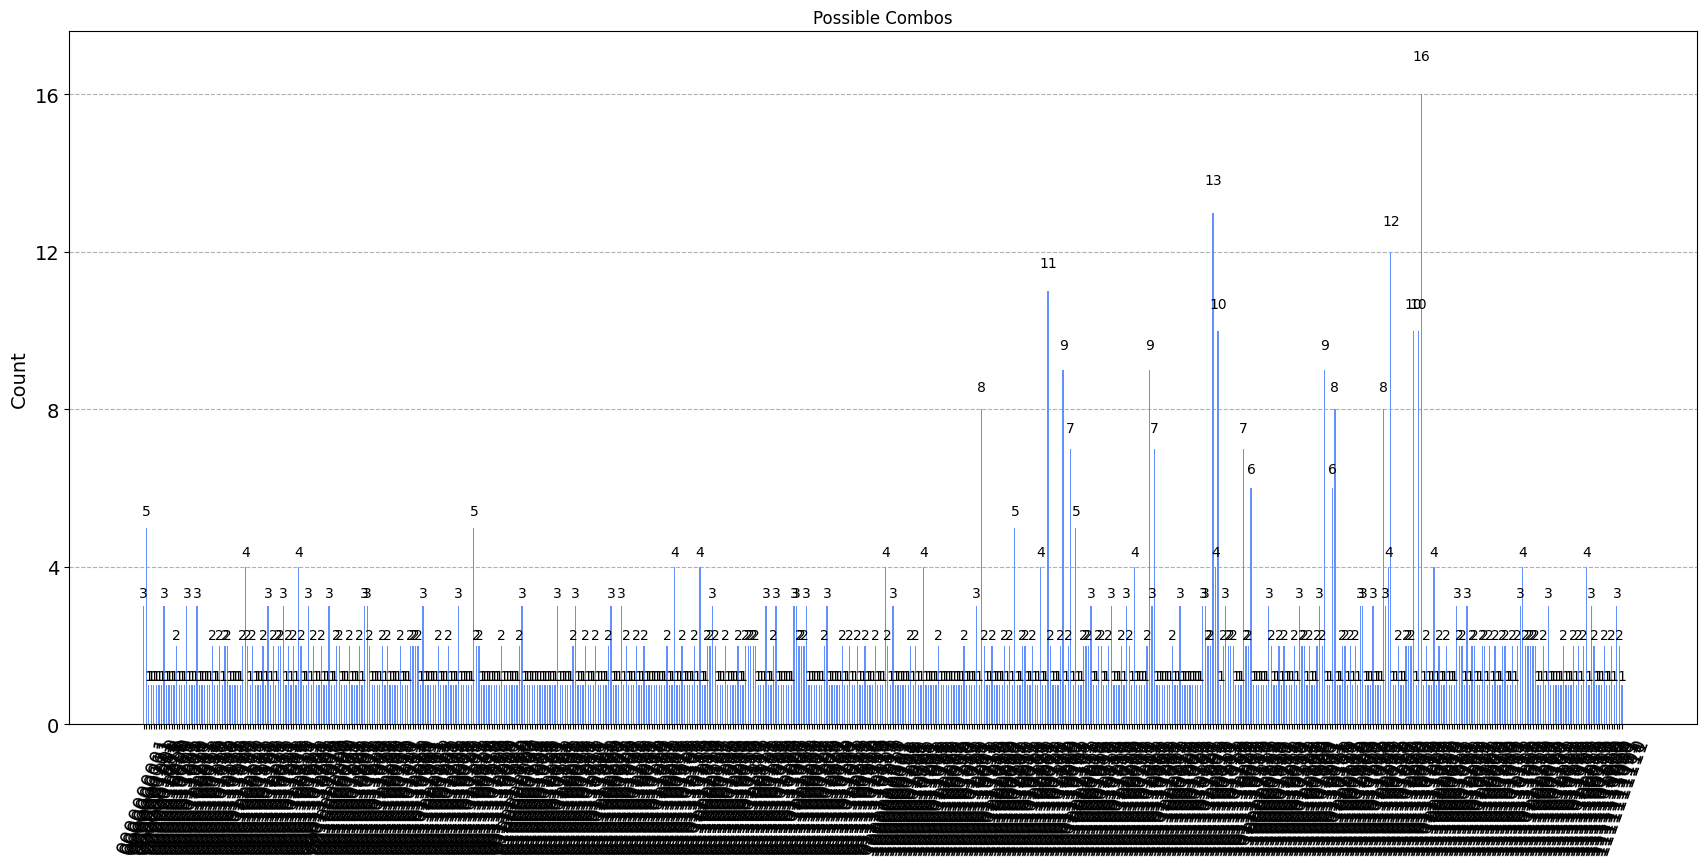

In [67]:
log_expr = '((A & B) | (B & C)) & ~ (B & D) & ((E & F) | (F & G)) & ~ (H & I) & ((J & A) | (I & B)) &  (F & J)'
# algorithm = Grover(PhaseOracle(log_expr)) # replacement bellow 
problem = AmplificationProblem(PhaseOracle(log_expr))

backend = BasicAer.get_backend('qasm_simulator')

# result = algorithm.run(backend) # replaced by 2 lines below 
grover = Grover(quantum_instance=backend)
result = grover.amplify(problem)

import timeit
start = timeit.default_timer()
stop = timeit.default_timer()
print('Time: ', stop - start)  

plot_histogram(result.circuit_results, (21, 9), title = "Possible Combos", bar_labels = True)

In [57]:
#################################################################
# 2023 grover algorithm 
# instead of dealing with the backend directly ( QuantumInstance), 
# use Qiskit primative (Sampler) to be "future-proof"

In [66]:
from qiskit.primitives import Sampler

sampler = Sampler()
grover = Grover(sampler=sampler)
result = grover.amplify(problem)

In [64]:
##################################################################
# 3 Classical version and runtime 
log_expr = '((A & B) | (B & C)) & ~ (B & D) & ((E & F) | (F & G)) & ~ (H & I) & ((J & A) | (I & B)) &  (F & J)'



SyntaxError: invalid syntax (2020484222.py, line 20)